In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

import matplotlib.pyplot as plt

In [2]:
# Generate a random n-class classification problem
n = 10000
X, y = make_classification(n_samples=n, n_features=1,  
                                             n_informative=1, n_redundant=0, n_clusters_per_class=1)

# Create a dataframe of the feature and class
df = pd.DataFrame({'Feature': X.flatten(), 'Class': y.flatten()})
print('Dataframe Head')
print(df.head())
print()

Dataframe Head
    Feature  Class
0  0.512322      1
1 -0.470636      0
2 -0.526712      1
3 -1.439258      0
4 -0.465080      1



In [3]:
# http://blog.yhat.com/posts/logistic-regression-and-python.html
print('Model Summary')
import statsmodels.api as sm
logit=sm.Logit(df['Class'], df['Feature'])
result=logit.fit()
print(result.summary2())

Model Summary
Optimization terminated successfully.
         Current function value: 0.324145
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.532    
Dependent Variable: Class            AIC:              6484.8973
Date:               2018-11-06 14:21 BIC:              6492.1077
No. Observations:   10000            Log-Likelihood:   -3241.4  
Df Model:           0                LL-Null:          -6931.4  
Df Residuals:       9999             LLR p-value:      nan      
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     7.0000                                      
------------------------------------------------------------------
            Coef.    Std.Err.      z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
Feature     2.2992     0.0446   51.5473   0.0000   2.2118   2.3866



In [4]:
# Can we compare sklearn logistic regression with statsmodel logit?
# https://stats.stackexchange.com/questions/203740/logistic-regression-scikit-learn-vs-statsmodels

# sm
# statsmodel = sm.Logit(df['Class'], df['Feature'])
# print(statsmodel.fit().params)
# print()

# sklearn
# nX = df['Feature'].values.reshape(-1,1)
# ny = df['Class'].values
# mdl = LogisticRegression(C=1e9, solver='lbfgs')
# sklearn = mdl.fit(nX, ny)
# print('Iterations: ', sklearn.n_iter_)
# print('Intercept: ', sklearn.intercept_)
# print('Coefficient: ', sklearn.coef_)
# print()

In [5]:
# Intercept? http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

model = LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

print('Test size')
print(len(predictions))
print()

print('Accuracy Score')
print(accuracy_score(y_test, predictions))
print()

print('Confustion matrix')
print(confusion_matrix(y_test,predictions))
tn, fp, fn, tp = confusion_matrix(y_test,predictions).ravel()
print('tn: {} fp: {} fn: {} tp: {}'.format(tn, fp, fn, tp))
print()

print('Classification Report')
print(classification_report(y_test,predictions))
print()

Test size
2000

Accuracy Score
0.8665

Confustion matrix
[[862 141]
 [126 871]]
tn: 862 fp: 141 fn: 126 tp: 871

Classification Report
             precision    recall  f1-score   support

          0       0.87      0.86      0.87      1003
          1       0.86      0.87      0.87       997

avg / total       0.87      0.87      0.87      2000




In [6]:
print('Misclassified count and location')
misclassified = np.flatnonzero(y_test != predictions)
print(len(misclassified), misclassified)
print()
print(df.loc[misclassified,:].head())

Misclassified count and location
267 [   1    2   11   17   35   39   43   45   54   55   64   69   71   79   84
   85   87   93   94  104  117  119  130  135  139  148  152  161  163  171
  176  185  189  201  205  207  216  218  228  232  234  242  246  255  257
  258  259  270  271  282  322  332  347  354  359  377  381  389  390  393
  403  417  437  443  461  462  468  485  493  500  516  524  526  537  544
  546  547  559  560  564  576  585  587  591  592  596  600  606  608  617
  624  628  632  638  646  648  649  662  663  678  684  695  696  708  724
  727  739  756  761  775  785  818  823  825  846  860  871  873  875  893
  894  904  919  923  926  937  968  976  982  985  986  990  993  996 1003
 1010 1021 1024 1026 1033 1034 1039 1043 1059 1070 1075 1078 1081 1092 1093
 1100 1108 1114 1122 1123 1127 1131 1132 1153 1176 1179 1180 1182 1193 1195
 1199 1211 1213 1219 1227 1232 1238 1247 1249 1254 1263 1274 1275 1280 1296
 1301 1306 1311 1318 1320 1330 1340 1341 1360 1364 

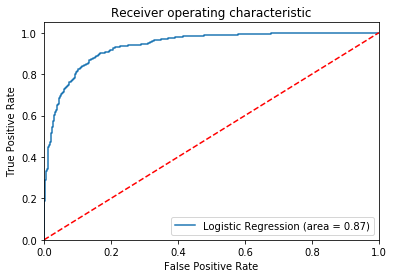

In [7]:
# https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
logit_roc_auc = roc_auc_score(y_test, predictions)
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

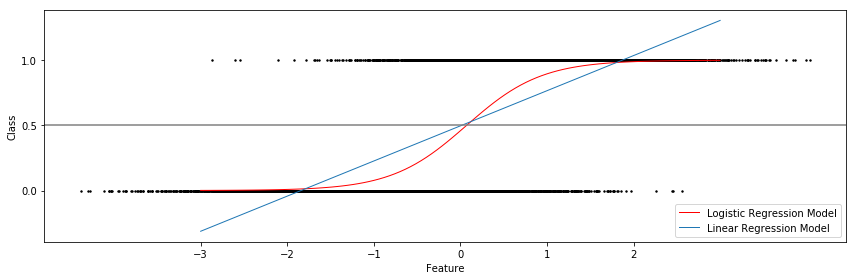

In [8]:
# http://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic.html#sphx-glr-auto-examples-linear-model-plot-logistic-py
# Code source: Gael Varoquaux
# License: BSD 3 clause

# Plot the logistic and linear models
plt.figure(figsize=(12, 4))
plt.clf()
plt.scatter(df['Feature'], df['Class'], color='black', s=2)
X_line = np.linspace(-3, 3, 100)

def model_func(x):
    return 1 / (1 + np.exp(-x))

loss = model_func(X_line * model.coef_ + model.intercept_).ravel()
plt.plot(X_line, loss, color='red', linewidth=1)

ols = LinearRegression()
ols.fit(X_train,y_train)
plt.plot(X_line, ols.coef_ * X_line + ols.intercept_, linewidth=1)
plt.axhline(.5, color='.5')

plt.ylabel('Class')
plt.xlabel('Feature')
plt.xticks(range(-3, 3))
plt.yticks([0, 0.5, 1])
plt.legend(('Logistic Regression Model', 'Linear Regression Model'), loc="lower right")
plt.tight_layout()
plt.show()